# 1 - Introduction 

Nama : Geraldine Dewarani

Batch : RMT-019

Objectives : The objective of this case is to develop a machine learning model using random forest classification to predict whether an Airbnb listing is a superhost based on various features. This includes  understanding the concept of Supervised Learning, preparing the data for Supervised Learning models, implementing Supervised Learning techniques using the provided data, and performing Hyperparameter Tuning and Model Improvement to enhance the model's performance.

Deployment link : [superhost_airbnb_ml2](https://huggingface.co/spaces/andinedwrn/Superhost_Airbnb_ML2)

# 2 - Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 

from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import pointbiserialr

# preprocessing
from sklearn import datasets
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

#model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#evaluasi
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error

#hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#save model
import pickle, joblib
import json

# 3 - Data Loading

In [2]:
#Mount data from gdrive to colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Importing Data SET
df = pd.read_csv('/content/drive/MyDrive/GC-H8/airbnbeu.csv')

*This data was retrieved at kaggle *

Reference :
DIPESH KHEMANI. (2023).Airbnb Cleaned Europe Dataset(Version 1) [Data set]. https://www.kaggle.com/datasets/dipeshkhemani/airbnb-cleaned-europe-dataset

In [4]:
df.head(10)

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677
5,Amsterdam,552.808567,Weekday,Private room,False,True,3.0,False,0,0,8.0,100.0,2,2.131420,1.904668,174.788957,9.255191,225.201662,15.692376
6,Amsterdam,215.124317,Weekday,Private room,False,True,2.0,False,0,0,10.0,94.0,1,1.881092,0.729747,200.167652,10.599010,242.765524,16.916251
7,Amsterdam,2771.307384,Weekday,Entire home/apt,False,False,4.0,True,0,0,10.0,100.0,3,1.686807,1.458404,208.808109,11.056528,272.313823,18.975219
8,Amsterdam,1001.804420,Weekday,Entire home/apt,False,False,4.0,False,0,0,9.0,96.0,2,3.719141,1.196112,106.226456,5.624761,133.876202,9.328686
9,Amsterdam,276.521454,Weekday,Private room,False,True,2.0,False,1,0,10.0,88.0,1,3.142361,0.924404,206.252862,10.921226,238.291258,16.604478


In [5]:
df.tail(10)

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
41704,Vienna,463.501858,Weekend,Entire home/apt,False,False,5.0,False,1,0,10.0,90.0,2,1.021878,0.285141,176.754900,12.658020,283.426459,6.850308
41705,Vienna,727.391721,Weekend,Entire home/apt,False,False,6.0,False,0,1,10.0,96.0,3,0.568562,0.230806,209.898719,15.031561,411.553633,9.947093
41706,Vienna,718.275951,Weekend,Entire home/apt,False,False,6.0,False,0,1,10.0,95.0,3,0.565854,0.136006,212.077619,15.187600,420.030138,10.151966
41707,Vienna,115.933899,Weekend,Private room,False,True,4.0,False,1,0,9.0,94.0,1,3.041932,0.308192,109.751387,7.859670,208.517887,5.039797
41708,Vienna,750.765491,Weekend,Entire home/apt,False,False,6.0,False,0,1,10.0,96.0,3,0.378804,0.203138,257.494817,18.440080,548.973296,13.268473
41709,Vienna,715.938574,Weekend,Entire home/apt,False,False,6.0,False,0,1,10.0,100.0,3,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584
41710,Vienna,304.793960,Weekend,Entire home/apt,False,False,2.0,False,0,0,8.0,86.0,1,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427
41711,Vienna,637.168969,Weekend,Entire home/apt,False,False,2.0,False,0,0,10.0,93.0,1,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996
41712,Vienna,301.054157,Weekend,Private room,False,True,2.0,False,0,0,10.0,87.0,1,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416
41713,Vienna,133.230489,Weekend,Private room,False,True,4.0,True,1,0,10.0,93.0,1,1.263932,0.480903,150.450381,10.774264,225.247293,5.444140


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41714 entries, 0 to 41713
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   City                         41714 non-null  object 
 1   Price                        41714 non-null  float64
 2   Day                          41714 non-null  object 
 3   Room Type                    41714 non-null  object 
 4   Shared Room                  41714 non-null  bool   
 5   Private Room                 41714 non-null  bool   
 6   Person Capacity              41714 non-null  float64
 7   Superhost                    41714 non-null  bool   
 8   Multiple Rooms               41714 non-null  int64  
 9   Business                     41714 non-null  int64  
 10  Cleanliness Rating           41714 non-null  float64
 11  Guest Satisfaction           41714 non-null  float64
 12  Bedrooms                     41714 non-null  int64  
 13  City Center (km)

In [7]:
# Check the null value in the dataset
df.isnull().sum()

City                           0
Price                          0
Day                            0
Room Type                      0
Shared Room                    0
Private Room                   0
Person Capacity                0
Superhost                      0
Multiple Rooms                 0
Business                       0
Cleanliness Rating             0
Guest Satisfaction             0
Bedrooms                       0
City Center (km)               0
Metro Distance (km)            0
Attraction Index               0
Normalised Attraction Index    0
Restraunt Index                0
Normalised Restraunt Index     0
dtype: int64

## Data Pre-Processing 

changing bool columns to int

In [8]:
df['Shared Room'] = df['Shared Room'].astype(int)
df['Private Room'] = df['Private Room'].astype(int)
df['Superhost'] = df['Superhost'].astype(int)


# 4 - EDA

## Basic Statistic

In [9]:
# Descriptive Statistic of feature
df.describe()

,Price,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
count,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000
mean,260.094423,0.007575,0.314858,3.237235,0.279498,0.295273,0.341180,9.442274,93.103179,1.165939,2.679792,0.603921,293.905990,11.719658,626.692618,25.553590
std,279.408493,0.086707,0.464465,1.299459,0.448758,0.456171,0.474112,0.889173,8.141745,0.638157,1.996684,0.706206,235.750055,8.379161,520.644720,18.484572
min,34.779339,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,20.000000,0.000000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757
25%,144.016085,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,9.000000,90.000000,1.000000,1.275913,0.236693,124.371614,5.510735,210.459574,11.132052
50%,203.819274,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,10.000000,95.000000,1.000000,2.253237,0.391220,228.920599,9.951086,519.583509,21.814414
75%,297.373358,0.000000,1.000000,4.000000,1.000000,1.000000,1.000000,10.000000,98.000000,1.000000,3.584489,0.678702,394.000201,15.467009,860.708156,36.821356
max,18545.450285,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,10.000000,100.000000,10.000000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000


The provided data of european airbnb listings are giving some interesting insights :
- The average price of Airbnb listings is approximately $260
- Most listings are either private rooms (31.5%) or entire home/apartments (31.5%), while shared rooms constitute a small percentage (0.76%).
- The average person capacity of the listings is 3 people, with a maximum capacity of 6 people.
- Around 27.9% of the listings are classified as superhosts.
- The average cleanliness rating is 9.44, and the average guest satisfaction rating is 93.1, indicating a high level of satisfaction among guests, and also a high standart of cleanliness of every property listed in airbnb
- The average number of bedrooms in the listings is 1.with a maximum of 10 bedrooms.
- The average distance to the city center is 2.68 km, with a maximum distance of 25.28 km.
- The attraction index and restaurant index provide an indication of the nearby attractions and restaurants in the listing's location.

These insights give us a glimpse into the characteristics of Airbnb listings and can help us understand the factors that contribute to being a superhost. 

## Superhost Characteristic

In [10]:
# Filter the dataframe for superhosts only
superhosts_df = df[df['Superhost'] == 1]

In [11]:
room_type_counts = superhosts_df['Room Type'].value_counts(normalize=True)
room_type_counts

Entire home/apt    0.723904
Private room       0.273094
Shared room        0.003002
Name: Room Type, dtype: float64

among 27% of superhost whose hosted the airbnb in europe, 72,3% of them owned entire home/apt type of room and some of them owned a private room. Its suggesting that the majority of superhosts in Europe prefer to offer entire home/apartment rentals to their guests. This could indicate that superhosts prioritize providing a more independent and private experience for their guests, which is reflected in the higher percentage of entire home/apartment listings compared to private rooms. By offering the entire home/apartment, superhosts can potentially attract guests who value privacy, comfort, and a more immersive experience during their stay. However, it's worth noting that a significant portion of superhosts still offer private rooms, suggesting that there is a diverse range of hosting preferences and strategies among superhosts in Europe.

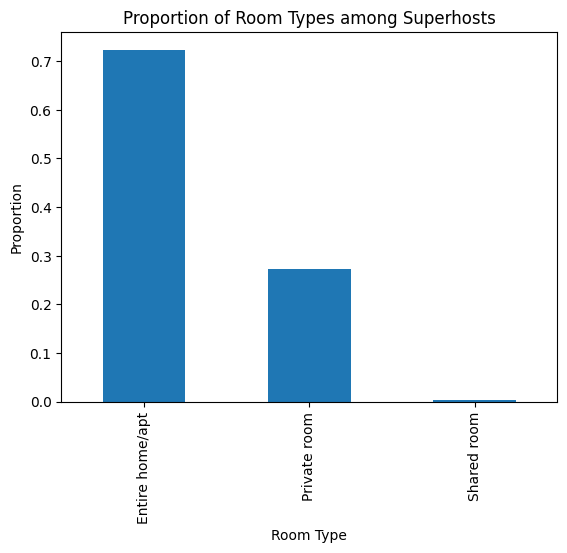

In [12]:
room_type_counts.plot(kind='bar')
plt.xlabel('Room Type')
plt.ylabel('Proportion')
plt.title('Proportion of Room Types among Superhosts')
plt.show()

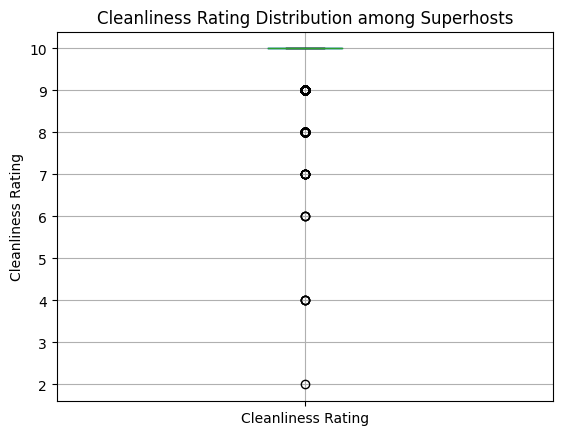

In [13]:
superhosts_df.boxplot(column='Cleanliness Rating')
plt.ylabel('Cleanliness Rating')
plt.title('Cleanliness Rating Distribution among Superhosts')
plt.show()

with the average cleanliness rating of overall data is 9.44, its setting the bar so high that the superhost cleanliness rating is 10 out of 10 proven by the boxplot above ☝️ 

In [14]:
# 3. Superhost vs. Person Capacity
person_capacity_counts = superhosts_df['Person Capacity'].value_counts(normalize=True)
person_capacity_counts

2.0    0.401750
4.0    0.311347
3.0    0.129771
6.0    0.089802
5.0    0.067330
Name: Person Capacity, dtype: float64

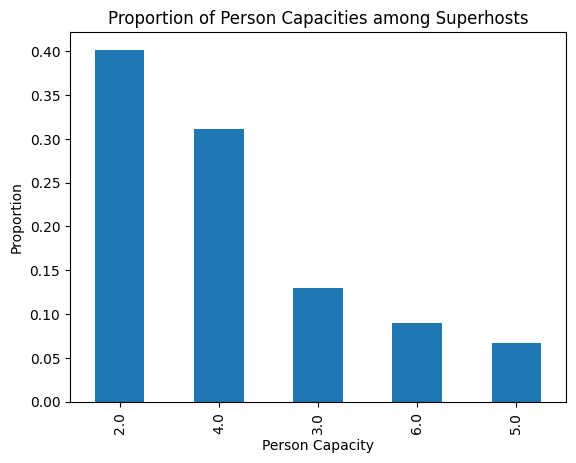

In [15]:
person_capacity_counts.plot(kind='bar')
plt.xlabel('Person Capacity')
plt.ylabel('Proportion')
plt.title('Proportion of Person Capacities among Superhosts')
plt.show()

Superhosts in Europe tend to offer accommodations with an even person capacity of 2 or 4, which account for 40.2% and 31.1% of the listings, respectively. This suggests that superhosts often cater to smaller groups or individual travelers. However, there are also listings with person capacities of 3, 6, and 5, although they are less common among superhosts. This distribution of person capacity highlights the flexibility and variety of accommodations provided by superhosts, allowing them to accommodate different group sizes and preferences of their guests.

In [16]:
# 4. Superhost vs. City Center Distance
superhosts_df['Distance Range'] = pd.cut(superhosts_df['City Center (km)'], bins=[0, 1, 2, 3, 4, float('inf')], labels=['0-1 km', '1-2 km', '2-3 km', '3-4 km', '4+ km'])
distance_range_counts = superhosts_df['Distance Range'].value_counts(normalize=True)
distance_range_counts

<ipython-input-16-876e14dd5bc9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  superhosts_df['Distance Range'] = pd.cut(superhosts_df['City Center (km)'], bins=[0, 1, 2, 3, 4, float('inf')], labels=['0-1 km', '1-2 km', '2-3 km', '3-4 km', '4+ km'])


1-2 km    0.290591
2-3 km    0.220774
4+ km     0.181233
0-1 km    0.174200
3-4 km    0.133202
Name: Distance Range, dtype: float64

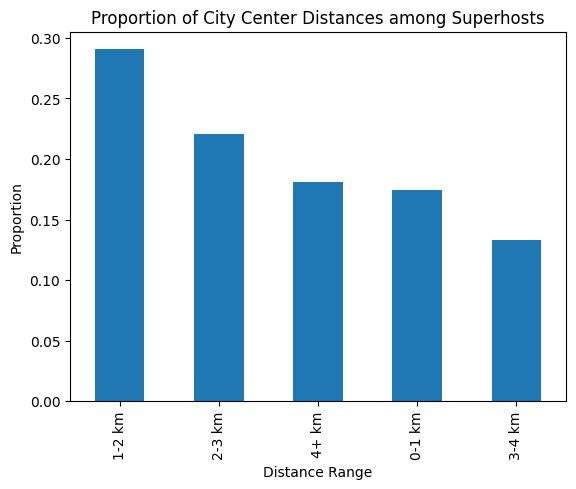

In [17]:
distance_range_counts.plot(kind='bar')
plt.xlabel('Distance Range')
plt.ylabel('Proportion')
plt.title('Proportion of City Center Distances among Superhosts')
plt.show()

these data indicating that a significant proportion of superhosts' properties in Europe are located within a 1-2 km distance range from the city center, accounting for 29.1% of the listings. This suggests that superhosts prioritize offering accommodations that are conveniently located near the main attractions and amenities of the city. 

## Price Distribution

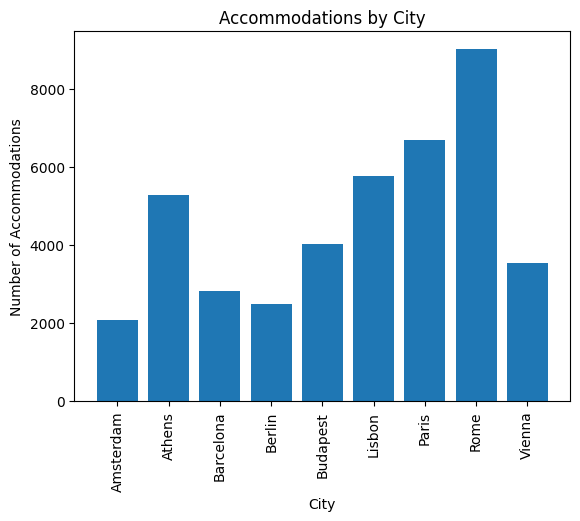

In [18]:
city_counts = df.groupby('City')['City'].count()
plt.bar(city_counts.index, city_counts.values)
plt.xlabel('City')
plt.ylabel('Number of Accommodations')
plt.title('Accommodations by City')
plt.xticks(rotation=90)
plt.show()

In [19]:
city_counts

City
Amsterdam    2080
Athens       5280
Barcelona    2833
Berlin       2484
Budapest     4022
Lisbon       5763
Paris        6688
Rome         9027
Vienna       3537
Name: City, dtype: int64

Based on the data, Rome stands out as having the highest number of Airbnb listings compared to other cities in Europe, with a count of 9,027 listings. This suggests that Rome is a popular destination for travelers, attracting a significant number of visitors looking for accommodations through Airbnb. 

There could be several factors contributing to the high number of listings in Rome. It could be due to the city's historical and cultural significance, as Rome is renowned for its ancient landmarks, art, and architecture, attracting tourists from around the world. The popularity of Rome as a tourist destination and the high demand for accommodations may have led to a greater number of hosts offering their properties on Airbnb.

Furthermore, Rome's size and status as the capital of Italy may also contribute to the higher number of listings. As a major city, Rome likely has a larger population and a greater number of residential properties available for short-term rentals.

It's also important to consider other factors such as local regulations and the ease of hosting on Airbnb in each city, which could vary and impact the number of listings.

Overall, the high number of Airbnb listings in Rome indicates its popularity as a tourist destination and suggests a strong demand for accommodations in the city.

In [20]:
# Group by city and room type, calculate mean price
grouped = df.groupby(['City', 'Room Type'])
mean_prices = grouped['Price'].mean()

# Get unique room types and cities
room_types = df['Room Type'].unique()
cities = df['City'].unique()


In [21]:
mean_prices

City       Room Type      
Amsterdam  Entire home/apt    734.699030
           Private room       383.468718
           Shared room        280.903616
Athens     Entire home/apt    155.079543
           Private room       112.838060
           Shared room         78.610490
Barcelona  Entire home/apt    629.855642
           Private room       214.714206
           Shared room        124.068083
Berlin     Entire home/apt    363.205813
           Private room       180.520256
           Shared room        153.192356
Budapest   Entire home/apt    184.573180
           Private room       109.137759
           Shared room        126.830447
Lisbon     Entire home/apt    282.495813
           Private room       148.902035
           Shared room        103.062725
Paris      Entire home/apt    425.107824
           Private room       299.218870
           Shared room        152.356013
Rome       Entire home/apt    240.784170
           Private room       148.787371
           Shared room        

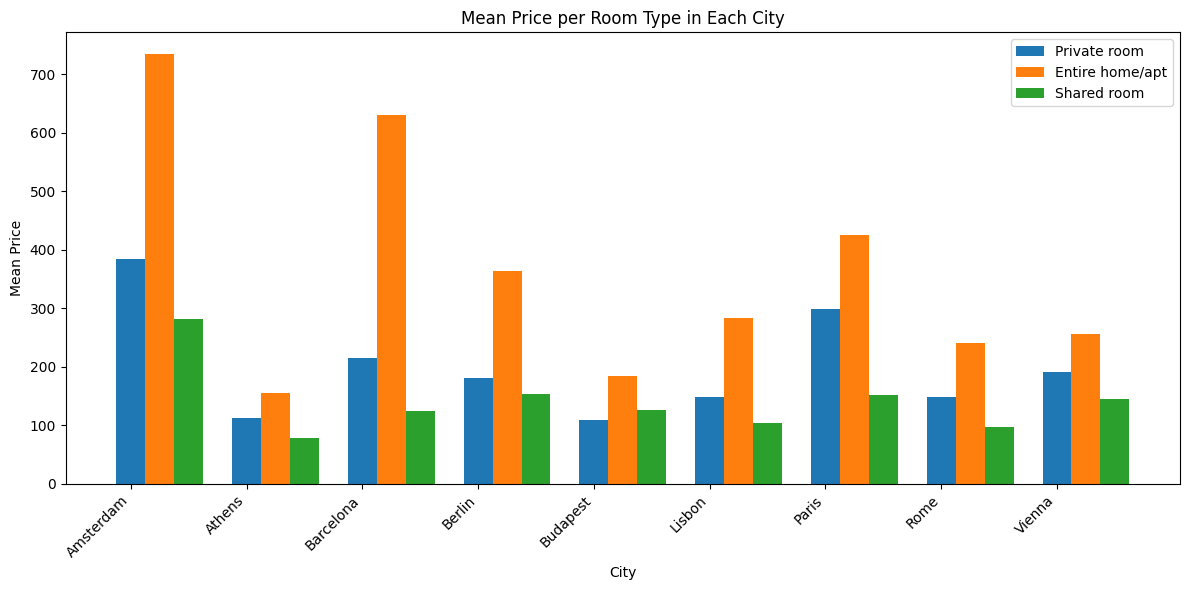

In [22]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Set the width of each bar
bar_width = 0.25

# Set the position of each bar on the x-axis
x = np.arange(len(cities))

# Iterate over each room type and plot the bars
for i, room_type in enumerate(room_types):
    room_type_prices = mean_prices.xs(room_type, level='Room Type')
    ax.bar(x + (i * bar_width), room_type_prices, width=bar_width, label=room_type)

#create plot
ax.set_xlabel('City')
ax.set_ylabel('Mean Price')
ax.set_title('Mean Price per Room Type in Each City')
ax.set_xticks(x)
ax.set_xticklabels(cities, rotation=45, ha='right')
ax.legend()
plt.tight_layout()
plt.show()

The data shows the average price of different room types in each city. Here are some insights:

- Amsterdam has the highest average price for entire home/apartment listings, indicating that these types of accommodations are relatively more expensive compared to private rooms or shared rooms in the city.
- Athens has the lowest average prices across all room types, suggesting that accommodations in Athens are generally more affordable compared to other cities in the dataset.
- Barcelona has a significant price difference between entire home/apartment listings and private/shared rooms, with entire home/apartment listings being much more expensive on average.
- Berlin has a relatively smaller price difference between entire home/apartment listings and private/shared rooms compared to other cities, indicating a more balanced pricing structure.
- Budapest has the lowest average prices for shared rooms, suggesting that it might be a popular choice for budget travelers or those seeking a more communal living experience.
- Paris has the highest average price for private rooms, indicating that private room accommodations in Paris tend to be relatively more expensive compared to other cities.
- Rome has the highest average price for entire home/apartment listings, indicating that these types of accommodations in Rome are relatively more expensive compared to other cities in the dataset.
- Vienna has a relatively small price difference between entire home/apartment listings and private/shared rooms, indicating a more balanced pricing structure similar to Berlin.


In [23]:
price_dist = df.groupby('Room Type')['Price'].mean()
price_dist

Room Type
Entire home/apt    290.131803
Private room       198.396473
Shared room        137.829673
Name: Price, dtype: float64

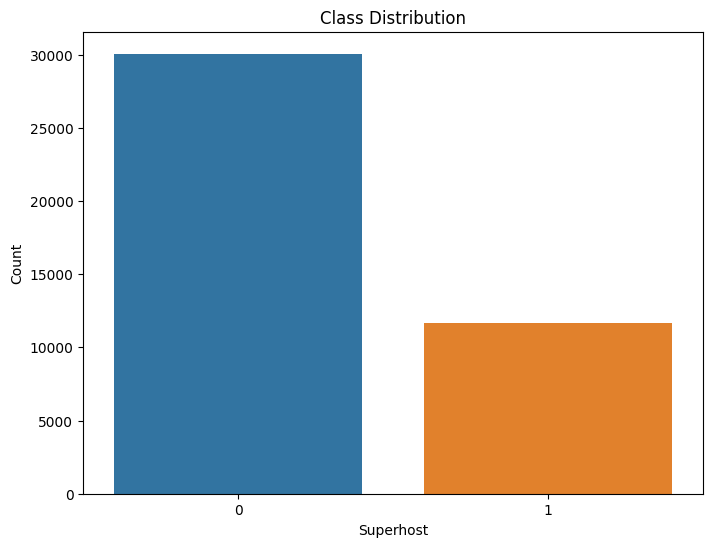

In [24]:
# Class distribution
class_distribution = df['Superhost'].value_counts()
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Superhost')
plt.xlabel('Superhost')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

Given that the class imbalance in the data is not extremely severe (27.9% superhosts vs. the rest classified as non-superhosts), it is possible that handling the imbalance may not be necessary in this case.  With almost 28% of the listings being classified as superhosts, there is a reasonable representation of the minority class in the dataset. This suggests that the model can still learn patterns and make accurate predictions for the superhost class without the need for balancing the classes

# 5 - Feature Engineering

## Split between target and feature

In [25]:
# Split the dataset into features (X) and target variable (y)
X = df.drop(['Shared Room', 'Private Room', 'Superhost', 'Multiple Rooms'], axis=1)
y = df['Superhost']
X

,City,Price,Day,Room Type,Person Capacity,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,2.0,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,4.0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,2.0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,4.0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,2.0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41709,Vienna,715.938574,Weekend,Entire home/apt,6.0,1,10.0,100.0,3,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584
41710,Vienna,304.793960,Weekend,Entire home/apt,2.0,0,8.0,86.0,1,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427
41711,Vienna,637.168969,Weekend,Entire home/apt,2.0,0,10.0,93.0,1,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996
41712,Vienna,301.054157,Weekend,Private room,2.0,0,10.0,87.0,1,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416


In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41714 entries, 0 to 41713
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   City                         41714 non-null  object 
 1   Price                        41714 non-null  float64
 2   Day                          41714 non-null  object 
 3   Room Type                    41714 non-null  object 
 4   Person Capacity              41714 non-null  float64
 5   Business                     41714 non-null  int64  
 6   Cleanliness Rating           41714 non-null  float64
 7   Guest Satisfaction           41714 non-null  float64
 8   Bedrooms                     41714 non-null  int64  
 9   City Center (km)             41714 non-null  float64
 10  Metro Distance (km)          41714 non-null  float64
 11  Attraction Index             41714 non-null  float64
 12  Normalised Attraction Index  41714 non-null  float64
 13  Restraunt Index 

In [65]:
X['City'].unique()

array(['Amsterdam', 'Athens', 'Barcelona', 'Berlin', 'Budapest', 'Lisbon',
       'Paris', 'Rome', 'Vienna'], dtype=object)

In [66]:
X['Room Type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [67]:
X['Day'].unique()

array(['Weekday', 'Weekend'], dtype=object)

## Split between train and test set

In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

## Split between numerical columns and categorical columns

In [28]:
#Get Numerical Columns and Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Num Columns : ', num_columns)
print('Cat Columns : ', cat_columns)

Num Columns :  ['Price', 'Person Capacity', 'Business', 'Cleanliness Rating', 'Guest Satisfaction', 'Bedrooms', 'City Center (km)', 'Metro Distance (km)', 'Attraction Index', 'Normalised Attraction Index', 'Restraunt Index', 'Normalised Restraunt Index']
Cat Columns :  ['City', 'Day', 'Room Type']


In [29]:
# Split Train-Set and Test-Set based on Column Types

X_train_num = X_train[num_columns]
X_test_num = X_test[num_columns]

X_train_cat = X_train[cat_columns]
X_test_cat = X_test[cat_columns]

X_train_num

,Price,Person Capacity,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
17117,281.425891,4.0,0,10.0,97.0,2,6.135290,0.798435,56.758745,1.873849,129.095646,5.773639
6604,168.021934,4.0,0,10.0,100.0,1,1.296308,0.169069,284.390524,10.715192,319.090648,4.765280
20680,549.484053,6.0,1,10.0,99.0,3,1.210753,0.605576,176.420293,5.818918,563.872050,31.691100
18760,312.382739,3.0,0,10.0,97.0,1,1.775705,1.085998,132.341748,4.369168,396.225012,17.720661
13988,128.307562,4.0,0,10.0,98.0,1,1.190785,0.100129,191.691347,11.431456,475.451947,36.002684
...,...,...,...,...,...,...,...,...,...,...,...,...
6265,234.105875,6.0,0,10.0,100.0,2,1.322993,0.443403,106.354915,4.007213,146.597510,2.189278
11284,128.540712,2.0,0,10.0,94.0,1,3.633049,2.651658,69.627017,10.616017,93.214277,19.220146
38158,681.738480,6.0,0,10.0,100.0,3,1.285198,0.466750,570.459176,12.638776,1371.912667,29.890649
860,274.178052,2.0,0,10.0,100.0,1,2.416838,0.252065,284.309671,15.054386,413.908992,28.841774


## Feature Encoding

In [30]:
X_train_cat.describe()

,City,Day,Room Type
count,33371,33371,33371
unique,9,2,3
top,Rome,Weekday,Entire home/apt
freq,7233,16741,22625


In [84]:
# Create an instance of the OneHotEncoder with sparse=True
encoder = OneHotEncoder(sparse=True)

# Fit and transform the categorical data for X_train and X_test
X_train_encoded = encoder.fit_transform(X_train_cat)
X_test_encoded = encoder.transform(X_test_cat)

# Create a new DataFrame with the encoded sparse matrix for X_train and X_test
X_train_encoded_df = pd.DataFrame.sparse.from_spmatrix(X_train_encoded, columns=encoder.get_feature_names_out(X_train_cat.columns))
X_test_encoded_df = pd.DataFrame.sparse.from_spmatrix(X_test_encoded, columns=encoder.get_feature_names_out(X_test_cat.columns))

X_test_encoded_df

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Budapest,City_Lisbon,City_Paris,City_Rome,City_Vienna,Day_Weekday,Day_Weekend,Room Type_Entire home/apt,Room Type_Private room,Room Type_Shared room
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
8339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
8340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
8341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


## Feature Scaling

In [32]:
X_train_num.describe()

,Price,Person Capacity,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
count,33371.000000,33371.000000,33371.000000,33371.000000,33371.000000,33371.000000,33371.000000,33371.000000,33371.000000,33371.000000,33371.000000,33371.000000
mean,260.344707,3.235474,0.340086,9.442330,93.125408,1.164484,2.678148,0.602441,294.453497,11.753630,627.818617,25.635793
std,269.099632,1.299681,0.473745,0.886751,8.110143,0.639995,1.992181,0.708827,237.119647,8.396934,520.271111,18.494135
min,34.779339,2.000000,0.000000,2.000000,20.000000,0.000000,0.015045,0.003935,15.152201,0.926301,19.576924,0.592757
25%,144.529523,2.000000,0.000000,9.000000,90.000000,1.000000,1.271983,0.236249,125.336365,5.550312,212.218690,11.207702
50%,204.110327,3.000000,0.000000,10.000000,95.000000,1.000000,2.254469,0.389910,229.832914,9.999169,520.355027,21.913245
75%,297.609977,4.000000,1.000000,10.000000,98.000000,1.000000,3.593944,0.676945,395.148870,15.496135,861.532619,36.957540
max,18545.450285,6.000000,1.000000,10.000000,100.000000,10.000000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000


In [33]:
# Featue Scaling using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
X_train_num_scaled

array([[0.01332456, 0.5       , 0.        , ..., 0.00956408, 0.01640342,
        0.05211775],
       [0.00719815, 0.5       , 0.        , ..., 0.09880413, 0.04486035,
        0.04197404],
       [0.02780584, 1.        , 1.        , ..., 0.04938361, 0.08152305,
        0.3128378 ],
       ...,
       [0.0349506 , 1.        , 0.        , ..., 0.11821982, 0.20254918,
        0.29472593],
       [0.01293301, 0.        , 0.        , ..., 0.14260177, 0.05906199,
        0.28417464],
       [0.00590324, 0.5       , 0.        , ..., 0.0846391 , 0.0338255 ,
        0.20985363]])

In [34]:
# Create a new DataFrame with the scaled sparse matrix for X_train and X_test
X_train_scaled_df= pd.DataFrame(X_train_num_scaled, columns=num_columns)
X_test_scaled_df= pd.DataFrame(X_test_num_scaled, columns=num_columns)
X_test_scaled_df

,Price,Person Capacity,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,0.003136,0.5,0.0,1.000,0.9625,0.1,0.168680,0.158442,0.014673,0.039501,0.014900,0.084729
1,0.006356,0.0,1.0,1.000,0.8500,0.1,0.025437,0.014231,0.123754,0.118530,0.179408,0.260862
2,0.008768,1.0,0.0,1.000,0.9750,0.3,0.091160,0.027454,0.019104,0.029095,0.019967,0.017006
3,0.013202,0.0,1.0,1.000,1.0000,0.0,0.160869,0.024509,0.055297,0.120317,0.080244,0.322292
4,0.044266,0.5,1.0,1.000,1.0000,0.2,0.166426,0.021590,0.019185,0.044869,0.017312,0.112566
...,...,...,...,...,...,...,...,...,...,...,...,...
8338,0.006849,0.5,0.0,1.000,0.9375,0.2,0.219039,0.060336,0.027314,0.021516,0.054238,0.077697
8339,0.010297,0.5,0.0,1.000,0.9750,0.1,0.102672,0.092681,0.136992,0.131848,0.296939,0.432851
8340,0.009021,0.5,0.0,1.000,1.0000,0.2,0.191412,0.035645,0.045439,0.039759,0.084538,0.121949
8341,0.016031,1.0,0.0,0.875,0.7875,0.2,0.092495,0.017683,0.133875,0.128712,0.208361,0.303231


Why we choose minmaxscaller in this case: 

1. Preservation of the data range: Min-Max Scaler scales the features to a specific range, typically between 0 and 1. This ensures that all the features have the same scale and are within a consistent range, which can be beneficial for certain algorithms that rely on this assumption.

2. Retention of the data distribution: Min-Max Scaler maintains the relative ordering and distribution of the data. It applies a linear transformation that shifts and scales the data, but the shape and structure of the data distribution remain intact.

3. Interpretability: Min-Max scaling retains the interpretability of the features as the transformed values are still within the original range. This can be helpful in understanding and interpreting the impact of the features on the target variable.

4. Sensitivity to outliers: Min-Max Scaler is sensitive to outliers, meaning that outliers can significantly impact the scaling process. If the dataset contains outliers that are considered important for the analysis, using Min-Max Scaler may help retain their relative positions within the scaled data.


## Concate final data

In [35]:
# Concatenate the scaled numerical data with the encoded categorical data for X_train
X_train_final = pd.concat([X_train_scaled_df, X_train_encoded_df], axis=1)

# Concatenate the scaled numerical data with the encoded categorical data for X_test
X_test_final = pd.concat([X_test_scaled_df, X_test_encoded_df], axis=1)

# Display the concatenated DataFrame for X_train
print(X_train_final)

# Display the concatenated DataFrame for X_test
print(X_test_final)

          Price  Person Capacity  Business  Cleanliness Rating  \
0      0.013325             0.50       0.0                 1.0   
1      0.007198             0.50       0.0                 1.0   
2      0.027806             1.00       1.0                 1.0   
3      0.014997             0.25       0.0                 1.0   
4      0.005053             0.50       0.0                 1.0   
...         ...              ...       ...                 ...   
33366  0.010768             1.00       0.0                 1.0   
33367  0.005065             0.00       0.0                 1.0   
33368  0.034951             1.00       0.0                 1.0   
33369  0.012933             0.00       0.0                 1.0   
33370  0.005903             0.50       0.0                 1.0   

       Guest Satisfaction  Bedrooms  City Center (km)  Metro Distance (km)  \
0                  0.9625       0.2          0.242199             0.055678   
1                  1.0000       0.1          0.0507

In [36]:
# Create DataFrame of `X_train_final` and 'X_test_final'
X_train_final_df = pd.DataFrame(X_train_final)
X_test_final_df = pd.DataFrame(X_test_final)
X_train_final_df

,Price,Person Capacity,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,...,City_Budapest,City_Lisbon,City_Paris,City_Rome,City_Vienna,Day_Weekday,Day_Weekend,Room Type_Entire home/apt,Room Type_Private room,Room Type_Shared room
0,0.013325,0.50,0.0,1.0,0.9625,0.2,0.242199,0.055678,0.009249,0.009564,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.007198,0.50,0.0,1.0,1.0000,0.1,0.050704,0.011572,0.059852,0.098804,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.027806,1.00,1.0,1.0,0.9875,0.3,0.047318,0.042162,0.035850,0.049384,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.014997,0.25,0.0,1.0,0.9625,0.1,0.069675,0.075830,0.026051,0.034751,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.005053,0.50,0.0,1.0,0.9750,0.1,0.046528,0.006741,0.039245,0.106034,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33366,0.010768,1.00,0.0,1.0,1.0000,0.2,0.051760,0.030797,0.020274,0.031097,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
33367,0.005065,0.00,0.0,1.0,0.9250,0.1,0.143177,0.185549,0.012110,0.097803,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
33368,0.034951,1.00,0.0,1.0,1.0000,0.3,0.050264,0.032434,0.123445,0.118220,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
33369,0.012933,0.00,0.0,1.0,1.0000,0.1,0.095047,0.017389,0.059834,0.142602,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [37]:
X_train_final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33371 entries, 0 to 33370
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype             
---  ------                       --------------  -----             
 0   Price                        33371 non-null  float64           
 1   Person Capacity              33371 non-null  float64           
 2   Business                     33371 non-null  float64           
 3   Cleanliness Rating           33371 non-null  float64           
 4   Guest Satisfaction           33371 non-null  float64           
 5   Bedrooms                     33371 non-null  float64           
 6   City Center (km)             33371 non-null  float64           
 7   Metro Distance (km)          33371 non-null  float64           
 8   Attraction Index             33371 non-null  float64           
 9   Normalised Attraction Index  33371 non-null  float64           
 10  Restraunt Index              33371 non-null  float64      

# 6 - Decision Tree

In [38]:
# Decision Tree Model
decisiontree = DecisionTreeClassifier()

In [39]:
# Train the model
decisiontree.fit(X_train_final, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


DecisionTreeClassifier()

In [40]:
y_pred_train_dt = decisiontree.predict(X_train_final)
y_pred_test_dt = decisiontree.predict(X_test_final)
y_pred_train_dt

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


array([1, 1, 1, ..., 1, 1, 0])

In [41]:
print("Evaluation: Decision Tree Classifier")
print('Training score: {:.4f}'.format(decisiontree.score(X_train_final, y_train)))
print('Test score: {:.4f}'.format(decisiontree.score(X_test_final, y_test)))

print(classification_report(y_test,y_pred_test_dt))

Evaluation: Decision Tree Classifier
Training score: 1.0000
Test score: 0.8574
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      6027
           1       0.75      0.73      0.74      2316

    accuracy                           0.86      8343
   macro avg       0.82      0.82      0.82      8343
weighted avg       0.86      0.86      0.86      8343



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


# 7 - Random Forest

In [43]:
# Random Forest Model
randomforest = RandomForestClassifier()

In [44]:
# Train the model
randomforest.fit(X_train_final, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


RandomForestClassifier()

In [45]:
y_pred_train_rf = randomforest.predict(X_train_final)
y_pred_test_rf = randomforest.predict(X_test_final)
y_pred_train_rf

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


array([1, 1, 1, ..., 1, 1, 0])

In [46]:
print("Evaluation: Random Forest Classifier")
print('Training score: {:.4f}'.format(randomforest.score(X_train_final, y_train)))
print('Test score: {:.4f}'.format(randomforest.score(X_test_final, y_test)))

print(classification_report(y_test,y_pred_test_rf))

Evaluation: Random Forest Classifier


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Training score: 1.0000


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Test score: 0.8771
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      6027
           1       0.83      0.70      0.76      2316

    accuracy                           0.88      8343
   macro avg       0.86      0.82      0.84      8343
weighted avg       0.87      0.88      0.87      8343



# 8 - Data Saving

In [47]:
# Save the Files
with open('decisiontree.pkl', 'wb') as file_1:
  pickle.dump(decisiontree, file_1)

with open('scaler.pkl', 'wb') as file_2:
  pickle.dump(scaler, file_2)

with open('encoder.pkl', 'wb') as file_3:
  pickle.dump(encoder, file_3)

with open('list_num_cols.txt', 'w') as file_4:
  json.dump(num_columns, file_4)

with open('list_cat_cols.txt','w') as file_5: 
  json.dump(cat_columns, file_5)
  
with open('randomforest.pkl', 'wb') as file_6:
  pickle.dump(randomforest, file_6)

# 9 - Cross Validation

In [48]:
# Create a list of the models
models = [decisiontree, randomforest]

# Perform cross-validation for each model
for model in models:
    scores = cross_val_score(model, X_train_final, y_train, cv=5, scoring='accuracy')
    print(f"Model: {type(model).__name__}")
    print(f"Cross-validation Accuracy: Mean = {scores.mean():.4f}, Std = {scores.std():.4f}")
    print("-" * 30)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

Model: DecisionTreeClassifier
Cross-validation Accuracy: Mean = 0.8272, Std = 0.0026
------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

Model: RandomForestClassifier
Cross-validation Accuracy: Mean = 0.8604, Std = 0.0048
------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Based on the provided cross-validation accuracy results, the RandomForestClassifier appears to be the most promising model for this case of binary classification, It has the highest mean cross-validation accuracy of 0.8611 and a relatively low standard deviation of 0.0032. The RandomForestClassifier demonstrates both high average performance and consistency across the cross-validated folds.


# 10 - Hyperparameter Tuning

In [49]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt']
}

In [50]:
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=randomforest, param_grid=param_grid, cv=5, scoring='accuracy')

In [52]:
# Fit the GridSearchCV to the training data
grid_search.fit(X_train_final, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [53]:
# Get the best hyperparameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best hyperparameters and best score
print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 0.8626051702677616


In [54]:
# Get Best Estimator

randomforest_gridcv_best = grid_search.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.94      0.92      6027
           1       0.83      0.70      0.76      2316

    accuracy                           0.88      8343
   macro avg       0.86      0.82      0.84      8343
weighted avg       0.87      0.88      0.87      8343
 



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


Confusion Matrix      : 


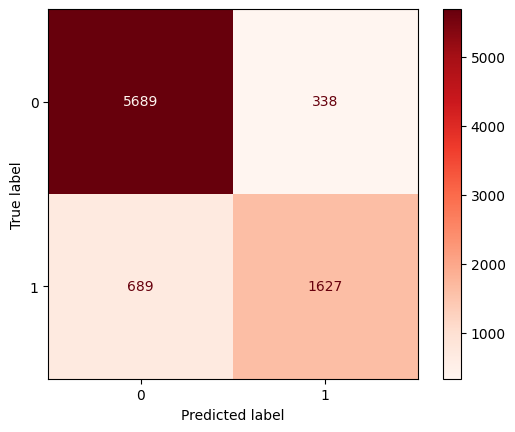

In [57]:
# Check Performance Model against Test-Set

y_pred_test = randomforest_gridcv_best.predict(X_test_final)

print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(randomforest_gridcv_best, X_test_final, y_test, cmap='Reds'))

The selected model of random forest which have the best predicting accuracy among other model in this case have an advantages and disadvatages which are :      

advantages : 
- able to handle overfitting, reducing it by aggregating multiple decisions trees
- able to handle imbalance data using under and oversampling techniques
- the model are moderately stable and consistent in producing prediction compare to single decision tree

disadvantage :    
- much more difficult to interpret because its made of multiple trees
- it also time consuming compared to other simpler model.


we can improve the model by combing with another model using ensemble technique like voting classifier. its done to leverage the strengths of each model and improve overall performance.

# 11 - Model Inference

In [82]:
# Define the number of new samples to generate
num_samples = 20

# Define the feature distributions
city = np.random.choice(['Amsterdam', 'Athens', 'Barcelona', 'Berlin', 'Budapest', 'Lisbon', 'Paris', 'Rome', 'Vienna'], size=num_samples)
price = np.random.uniform(low=0.0, high=1000.0, size=num_samples)
day = np.random.choice(['Weekday', 'Weekend'], size=num_samples)
room_type = np.random.choice(['Private room', 'Entire home/apt', 'Shared room'], size=num_samples)
person_capacity = np.random.uniform(low=0.0, high=1.0, size=num_samples)
business = np.random.randint(low=0, high=2, size=num_samples)
cleanliness_rating = np.random.uniform(low=0.0, high=1.0, size=num_samples)
guest_satisfaction = np.random.uniform(low=0.0, high=1.0, size=num_samples)
bedrooms = np.random.randint(low=1, high=5, size=num_samples)
city_center_km = np.random.uniform(low=0.0, high=10.0, size=num_samples)
metro_distance_km = np.random.uniform(low=0.0, high=10.0, size=num_samples)
attraction_index = np.random.uniform(low=0.0, high=1.0, size=num_samples)
normalized_attraction_index = np.random.uniform(low=0.0, high=1.0, size=num_samples)
restraunt_index = np.random.uniform(low=0.0, high=1.0, size=num_samples)
normalized_restraunt_index = np.random.uniform(low=0.0, high=1.0, size=num_samples)

# Create a new dataframe with the generated data
new_data = pd.DataFrame({
    'City': city,
    'Price': price,
    'Day': day,
    'Room Type': room_type,
    'Person Capacity': person_capacity,
    'Business': business,
    'Cleanliness Rating': cleanliness_rating,
    'Guest Satisfaction': guest_satisfaction,
    'Bedrooms': bedrooms,
    'City Center (km)': city_center_km,
    'Metro Distance (km)': metro_distance_km,
    'Attraction Index': attraction_index,
    'Normalised Attraction Index': normalized_attraction_index,
    'Restraunt Index': restraunt_index,
    'Normalised Restraunt Index': normalized_restraunt_index
})

new_data


,City,Price,Day,Room Type,Person Capacity,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,94.855135,Weekday,Entire home/apt,0.082657,1,0.611734,0.581199,4,2.671003,7.874311,0.923727,0.977967,0.711464,0.600262
1,Paris,727.220779,Weekend,Shared room,0.124880,1,0.974199,0.946105,3,7.749178,7.078337,0.669866,0.589525,0.243820,0.240435
2,Vienna,667.527397,Weekend,Entire home/apt,0.494625,0,0.315170,0.963856,3,9.830090,1.525385,0.035294,0.961978,0.465250,0.051745
3,Berlin,517.913251,Weekend,Entire home/apt,0.308566,0,0.540349,0.377578,3,6.481531,8.246266,0.349513,0.097604,0.851831,0.106247
4,Athens,690.265515,Weekend,Private room,0.724428,0,0.002995,0.603626,3,5.232608,6.017907,0.839913,0.769635,0.740558,0.843017
5,Amsterdam,873.520250,Weekday,Entire home/apt,0.411756,0,0.717558,0.417810,3,3.077963,9.843734,0.921545,0.424935,0.430799,0.177690
6,Budapest,800.606053,Weekend,Private room,0.920458,0,0.452059,0.614299,3,1.007815,9.086655,0.518452,0.020244,0.295829,0.095813
7,Athens,951.427689,Weekend,Shared room,0.282281,1,0.972543,0.610038,1,8.549016,5.188817,0.933025,0.266065,0.487908,0.239068
8,Budapest,579.136173,Weekend,Private room,0.837326,0,0.866744,0.151104,1,1.009466,6.577781,0.058016,0.603928,0.600573,0.896625
9,Amsterdam,881.642728,Weekend,Shared room,0.399713,0,0.043846,0.423746,3,1.873061,1.891268,0.214536,0.431829,0.585866,0.121129


In [83]:
# Split between Numerical Columns and Categorical Columns
new_data_num = new_data[num_columns]
new_data_cat = new_data[cat_columns]

In [85]:
# Feature Scaling and Feature Encoding
new_data_scaled = scaler.transform(new_data_num)
new_data_encoded = encoder.transform(new_data_cat)

In [ ]:
new_data_encoded_df = pd.DataFrame.sparse.from_spmatrix(new_data_encoded, columns=encoder.get_feature_names_out(new_data_cat.columns))
new_data_encoded_df

In [92]:
new_data_scaled_df= pd.DataFrame(new_data_scaled, columns=num_columns)
new_data_scaled_df

,Price,Person Capacity,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,0.003245,-0.479336,1.0,-0.173533,-0.242735,0.4,0.105105,0.551547,-0.003163,0.000521,-0.002826,0.000075
1,0.037408,-0.468780,1.0,-0.128225,-0.238174,0.3,0.306066,0.495766,-0.003219,-0.003399,-0.002896,-0.003544
2,0.034183,-0.376344,0.0,-0.210604,-0.237952,0.3,0.388415,0.106621,-0.003360,0.000360,-0.002862,-0.005442
3,0.026100,-0.422858,0.0,-0.182456,-0.245280,0.3,0.255901,0.577613,-0.003291,-0.008364,-0.002805,-0.004894
4,0.035411,-0.318893,0.0,-0.249626,-0.242455,0.3,0.206477,0.421452,-0.003182,-0.001581,-0.002821,0.002518
5,0.045311,-0.397061,0.0,-0.160305,-0.244777,0.3,0.121210,0.689562,-0.003163,-0.005061,-0.002868,-0.004175
6,0.041372,-0.269886,0.0,-0.193493,-0.242321,0.3,0.039287,0.636506,-0.003253,-0.009145,-0.002888,-0.004999
7,0.049520,-0.429430,1.0,-0.128432,-0.242375,0.1,0.337718,0.363351,-0.003161,-0.006664,-0.002859,-0.003558
8,0.029408,-0.290668,0.0,-0.141657,-0.248111,0.1,0.039353,0.460688,-0.003355,-0.003254,-0.002842,0.003057
9,0.045750,-0.400072,0.0,-0.244519,-0.244703,0.3,0.073528,0.132262,-0.003321,-0.004991,-0.002844,-0.004744


In [95]:
# Concatenate the scaled numerical data with the encoded categorical data for X_test
new_final= pd.concat([new_data_scaled_df, new_data_encoded_df], axis=1)
new_final

,Price,Person Capacity,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,...,City_Budapest,City_Lisbon,City_Paris,City_Rome,City_Vienna,Day_Weekday,Day_Weekend,Room Type_Entire home/apt,Room Type_Private room,Room Type_Shared room
0,0.003245,-0.479336,1.0,-0.173533,-0.242735,0.4,0.105105,0.551547,-0.003163,0.000521,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.037408,-0.468780,1.0,-0.128225,-0.238174,0.3,0.306066,0.495766,-0.003219,-0.003399,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.034183,-0.376344,0.0,-0.210604,-0.237952,0.3,0.388415,0.106621,-0.003360,0.000360,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,0.026100,-0.422858,0.0,-0.182456,-0.245280,0.3,0.255901,0.577613,-0.003291,-0.008364,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.035411,-0.318893,0.0,-0.249626,-0.242455,0.3,0.206477,0.421452,-0.003182,-0.001581,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5,0.045311,-0.397061,0.0,-0.160305,-0.244777,0.3,0.121210,0.689562,-0.003163,-0.005061,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6,0.041372,-0.269886,0.0,-0.193493,-0.242321,0.3,0.039287,0.636506,-0.003253,-0.009145,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7,0.049520,-0.429430,1.0,-0.128432,-0.242375,0.1,0.337718,0.363351,-0.003161,-0.006664,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8,0.029408,-0.290668,0.0,-0.141657,-0.248111,0.1,0.039353,0.460688,-0.003355,-0.003254,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9,0.045750,-0.400072,0.0,-0.244519,-0.244703,0.3,0.073528,0.132262,-0.003321,-0.004991,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [96]:
# Perform model inference
predictions = randomforest.predict(new_final)
predictions

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# 12 - Conclusion 

In conclusion, our objective was to develop a machine learning model using random forest classification to predict whether an Airbnb listing is a superhost.  This project showcases our proficiency in applying supervised learning techniques and demonstrates the value of collective knowledge and collaborative problem-solving. The dataset was effectively prepared and preprocessed, and multiple classification algorithms including Decision Tree and Random Forest,  were implemented. Cross-validation and evaluation metrics were employed to assess the models' performance, with the Random Forest model demonstrating the highest accuracy. The model was further improved through hyperparameter tuning, resulting in enhanced predictive capabilities. Overall, this project has demonstrated the successful application of Supervised Learning techniques and data analysis methodologies to develop an effective Classification model for predicting Airbnb's superhost predicate.